# _US Crime Trends: Uncovering Patterns and Insights through Exploratory Data Analysis_

## Reading Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Downloads/Crime_Data_from_2020_to_Present.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/Crime_Data_from_2020_to_Present.csv'

In [4]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [38]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Race', 'weekday', 'month', 'year'],
      dtype='object')

### Description of all the columns:
- DR_NO: Report number for the crime incident.
- Date Rptd: Date the crime was reported.
- DATE OCC: Date the crime occurred.
- TIME OCC: Time the crime occurred.
- AREA: Area code where the crime occurred.
- AREA NAME: Name of the area where the crime occurred.
- Rpt Dist No: Reporting district number.
- Part 1-2: Indicates if the crime is Part 1 or Part 2 offense.
- Crm Cd: Crime code.
- Crm Cd Desc: Description of the crime.
- Mocodes: Modus Operandi (Method of operation) codes.
- Vict Age: Age of the victim.
- Vict Sex: Sex of the victim.
- Vict Descent: Descent of the victim.
- Premis Cd: Premises code where the crime occurred.
- Premis Desc: Description of the premises.
- Weapon Used Cd: Code indicating if a weapon was used.
- Weapon Desc: Description of the weapon used.
- Status: Status of the crime report.
- Status Desc: Description of the status.
- Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4: Additional crime codes.
- LOCATION: Location where the crime occurred.
- Cross Street: Cross street of the location.
- LAT: Latitude coordinate of the location.
- LON: Longitude cooes
rdinate of the location.

## Null Values

In [6]:
df.isnull().sum().sort_values(ascending=False)

Crm Cd 4          883925
Crm Cd 3          881811
Crm Cd 2          819490
Cross Street      744208
Weapon Desc       577383
Weapon Used Cd    577383
Race              132154
Mocodes           123013
Vict Descent      117068
Vict Sex          117060
Premis Desc          540
Crm Cd 1              11
Premis Cd             10
Vict Age               0
Date Rptd              0
Crm Cd Desc            0
Crm Cd                 0
Part 1-2               0
Status                 0
Status Desc            0
Rpt Dist No            0
AREA NAME              0
AREA                   0
TIME OCC               0
LOCATION               0
DATE OCC               0
LAT                    0
LON                    0
DR_NO                  0
dtype: int64

## Weekly Trends: Analysis of Crime Incidents on a Weekly Basis

In [51]:
# Convert 'Date Rptd' to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

# Extract weekday from 'Date Rptd'
df['weekday'] = df['Date Rptd'].dt.weekday

# Map the numeric weekday to the corresponding weekday name
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['weekday'] = df['weekday'].map(weekday_names)
df_weekday = df['weekday'].value_counts().sort_values(ascending=False)
df_weekday

weekday
Monday       138918
Tuesday      132630
Wednesday    131340
Thursday     128466
Friday       126346
Saturday     114031
Sunday       112173
Name: count, dtype: int64

🟡 Most crimes are reported on Mondays, with Sundays having the lowest reported crime rate.

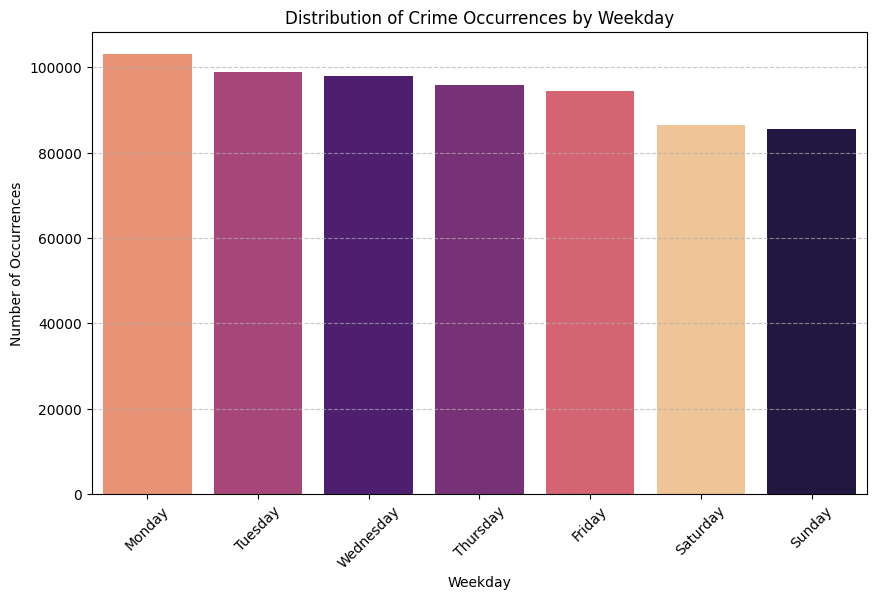

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Convert 'Date Rptd' to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

# Extract weekday from 'Date Rptd'
df['weekday'] = df['Date Rptd'].dt.strftime('%A')

# Plot the distribution of crime occurrences by weekday using Seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weekday', hue='weekday', order=df['weekday'].value_counts().index, palette='magma', legend=False)
plt.title('Distribution of Crime Occurrences by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Percentage wise distribution

In [9]:
total_crimes = df_weekday.sum()
df_weekday_percentage = (df_weekday / total_crimes) * 100

print(df_weekday_percentage)

weekday
Monday       15.716181
Tuesday      15.005764
Wednesday    14.859608
Thursday     14.534150
Friday       14.294554
Saturday     12.899850
Sunday       12.689892
Name: count, dtype: float64


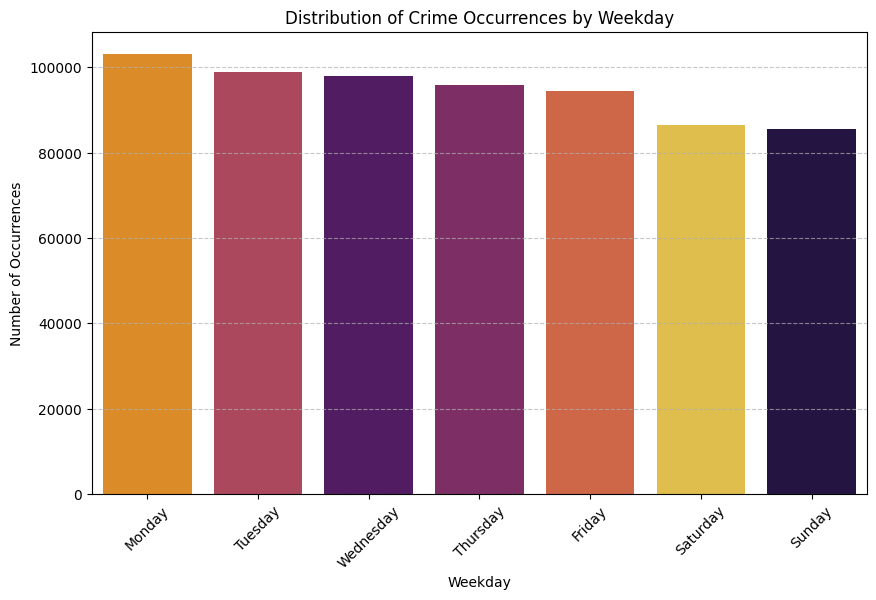

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Convert 'Date Rptd' to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

# Extract weekday from 'Date Rptd'
df['weekday'] = df['Date Rptd'].dt.strftime('%A')

# Plot the distribution of crime occurrences by weekday using Seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weekday', hue='weekday', order=df['weekday'].value_counts().index, palette='inferno', legend=False)
plt.title('Distribution of Crime Occurrences by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Monthly Patterns: Examination of Crime Trends on a Monthly Scale

In [13]:
import calendar
df['month'] = df['Date Rptd'].dt.month
df_month = df['month'].value_counts().sort_values(ascending=False).reset_index().sort_values(by = 'month')
df_month['month'] = df_month['month'].map(lambda x: calendar.month_name[x])
df_month

,month,count
0,January,84053
11,February,68370
9,March,71015
10,April,69984
5,May,73122
4,June,73273
2,July,75446
1,August,75576
7,September,72634
3,October,75437


🟡 January had the highest number of reported cases while february had the lowest number of reported cases.

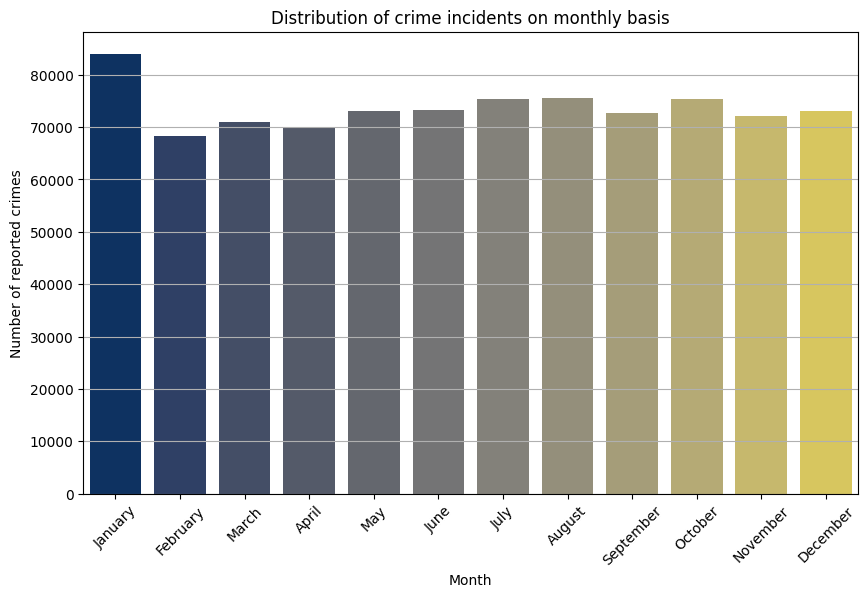

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for the count of crimes per month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', hue='month', data=df_month, palette='cividis', legend=False)
plt.title('Distribution of crime incidents on monthly basis')
plt.xlabel('Month')
plt.ylabel('Number of reported crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

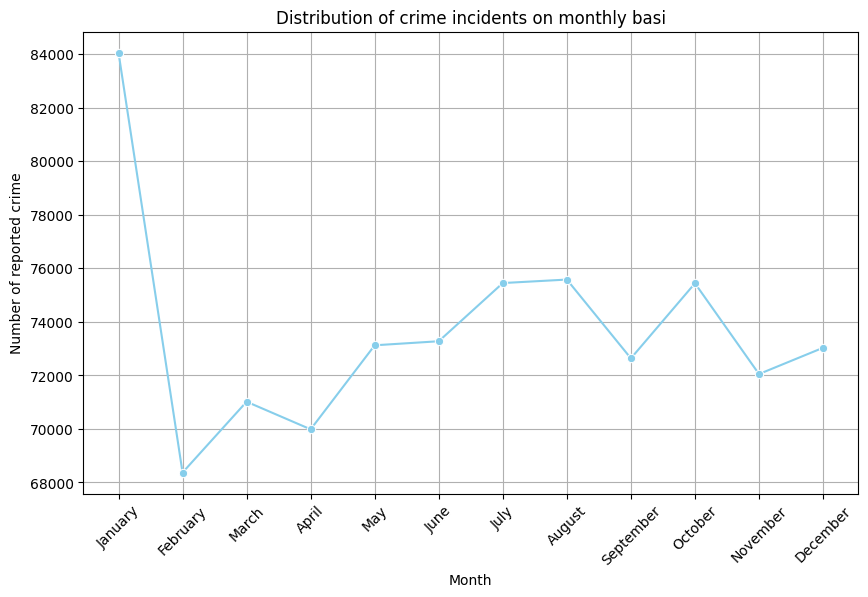

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the count of crimes per month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='count', data=df_month, marker='o', color='skyblue')
plt.title('Distribution of crime incidents on monthly basi')
plt.xlabel('Month')
plt.ylabel('Number of reported crime')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Yearly Analysis: Trends and Patterns in Crime Over the Years

In [17]:
df['year'] = df['Date Rptd'].dt.year
df_year = df['year'].value_counts().reset_index().sort_values(by='year')
df_year

,year,count
3,2020,192705
2,2021,208284
0,2022,235069
1,2023,234613
4,2024,13316


🟡 The year 2024 shows very less number of reported cases because this project is being done on Feb 2024 and we have only one month's data of 2024.

🟡 The year 2020 had the highest number of crimes reported. 

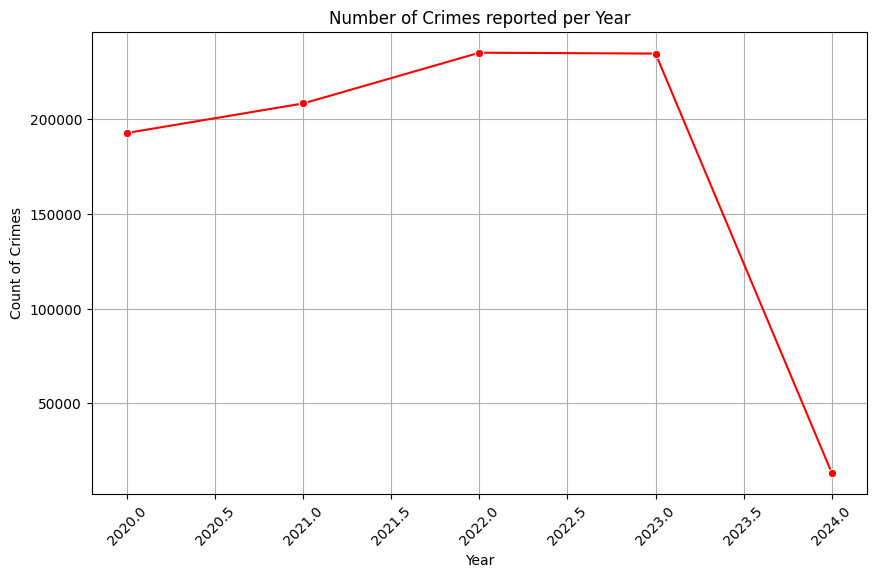

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the count of crimes per year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', data=df_year, marker='o', color='red')
plt.title('Number of Crimes reported per Year')
plt.xlabel('Year')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Reporting vs. Occurrence: Comparison of Reported Date and Occurrence Date

In [121]:
#Number of cases that were reported the same day they occurred
same_day = (df['Date Rptd'] == df['DATE OCC']).sum()
same_per = same_day/ len(df) *100
same_per

49.237247483889654

In [122]:
#Number of cases that were not reported the same day they occurred
diff_day = (df['Date Rptd'] != df['DATE OCC']).sum()
diff_per = diff_day/ len(df)*100
diff_per

50.762752516110346

🟡 Only 49.2% of the crimes were reported on the same day as the occurence of the crime.

## Area Distribution: Spatial Distribution of Crime Incidents

In [21]:
df['AREA NAME'].value_counts().sort_values( ascending=False)

AREA NAME
Central        60123
77th Street    55450
Pacific        51520
Southwest      49598
Hollywood      46558
Southeast      44696
Olympic        44621
N Hollywood    44263
Newton         44214
Wilshire       42269
Rampart        41644
West LA        40495
Northeast      38019
Van Nuys       37351
West Valley    37157
Harbor         36422
Topanga        36110
Devonshire     35977
Mission        35202
Hollenbeck     32993
Foothill       29305
Name: count, dtype: int64

🔍 There were a lot of crimes in the Central area. I would like to investigate further the kind of crimes most common in that area.

In [22]:
df['AREA NAME'].value_counts().sort_values( ascending=True)

AREA NAME
Foothill       29305
Hollenbeck     32993
Mission        35202
Devonshire     35977
Topanga        36110
Harbor         36422
West Valley    37157
Van Nuys       37351
Northeast      38019
West LA        40495
Rampart        41644
Wilshire       42269
Newton         44214
N Hollywood    44263
Olympic        44621
Southeast      44696
Hollywood      46558
Southwest      49598
Pacific        51520
77th Street    55450
Central        60123
Name: count, dtype: int64

📉 Foothill area had the minimum number of crime rate.

#### Top 20 areas with the highest crime rates:

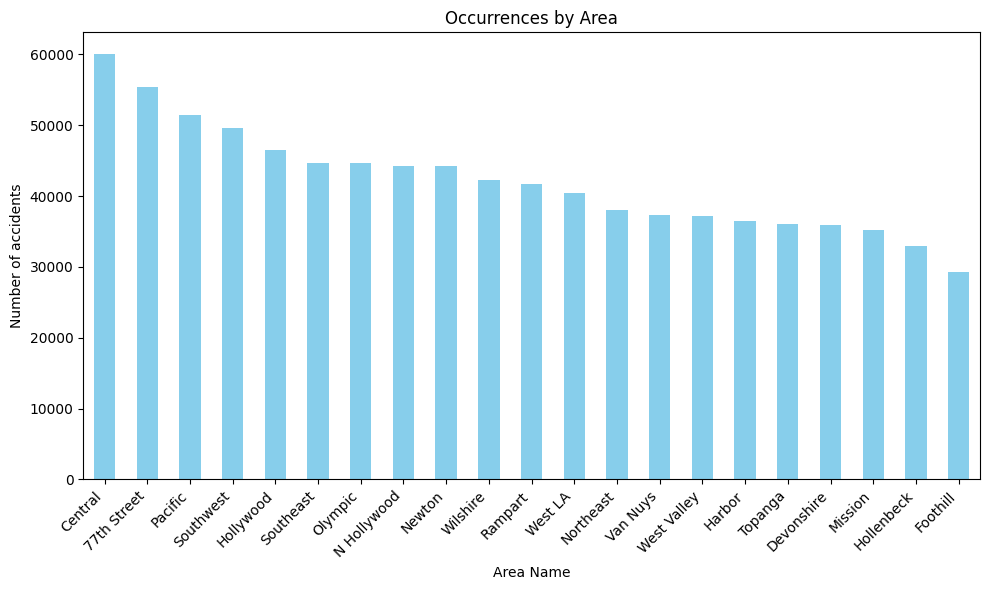

In [23]:
import matplotlib.pyplot as plt

# Calculate counts of occurrences for each area and sort in descending order
area_counts = df['AREA NAME'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
area_counts.plot(kind='bar', color='skyblue')
plt.title('Occurrences by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Location Analysis: Geographical Patterns of Crime Occurrence

In [24]:
df['LOCATION'].value_counts().sort_values( ascending=False)

LOCATION
800 N  ALAMEDA                      ST      1667
6TH                          ST             1474
7TH                          ST             1403
10200    SANTA MONICA                 BL    1400
7TH                                         1377
                                            ... 
3500    STONEWOOD                    DR        1
10300    LAS LUNITAS                  AV       1
11600    VIKING                       AV       1
3700    STARGAZER                    AV        1
6400 N  FIGUEROAA                    ST        1
Name: count, Length: 64796, dtype: int64

🔍 The location "800 N Alameda St" has the highest count of incidents, with a total of 1667 reported cases.

## Gender Disparities: Analysis of Crime Rates by Gender

In [25]:
df['Vict Sex'].unique()
# I am not sure what X and H means here. So ignoring those two.

array(['M', 'X', 'F', nan, 'H', '-'], dtype=object)

In [26]:
df['Vict Sex'].value_counts().sort_values( ascending=False)[:2]

Vict Sex
M    363260
F    323891
Name: count, dtype: int64

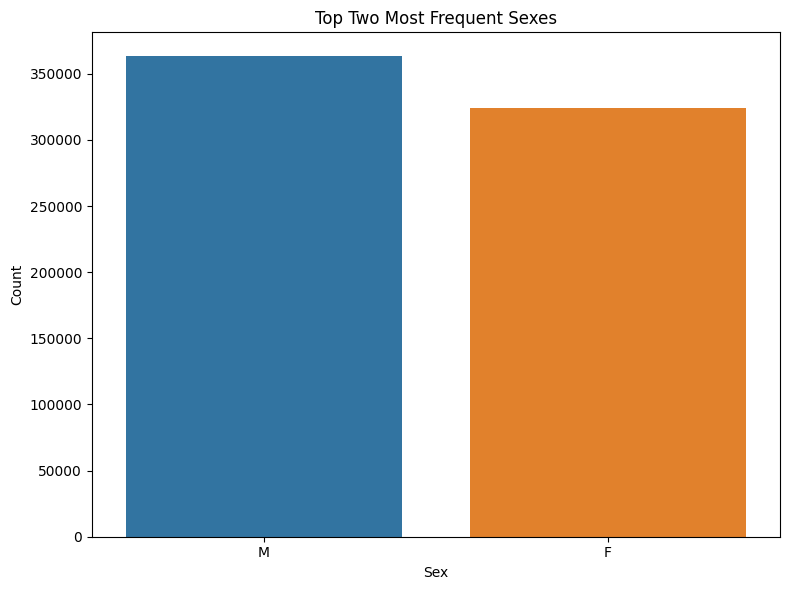

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top two most frequent values and their counts
top_sex_counts = df['Vict Sex'].value_counts().sort_values(ascending=False)[:2]

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=top_sex_counts.index, y=top_sex_counts.values, hue=top_sex_counts.index, dodge=False)
plt.title('Top Two Most Frequent Sexes')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

***
📊 The number of male victimsweres higher.
***

In [28]:
df[df['Vict Sex'] == 'F']['Crm Cd Desc'].value_counts().sort_values(ascending=False)
## This calculates the most common type of crime faced by women

Crm Cd Desc
INTIMATE PARTNER - SIMPLE ASSAULT           33499
BATTERY - SIMPLE ASSAULT                    33043
THEFT OF IDENTITY                           31802
BURGLARY FROM VEHICLE                       22692
THEFT PLAIN - PETTY ($950 & UNDER)          19434
                                            ...  
BRIBERY                                         2
FIREARMS RESTRAINING ORDER (FIREARMS RO)        1
LYNCHING - ATTEMPTED                            1
GRAND THEFT / AUTO REPAIR                       1
INCITING A RIOT                                 1
Name: count, Length: 132, dtype: int64

🔍 The prevalent types of crime experienced by women were: Assault by an intimate partner, General assault by anyone, and Identity theft.tity


In [29]:
df[df['Vict Sex'] == 'M']['Crm Cd Desc'].value_counts().sort_values(ascending=False)
## This calculates the most common type of crime faced by men

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                   36827
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             36028
BURGLARY FROM VEHICLE                                      30559
BURGLARY                                                   26727
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    24710
                                                           ...  
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
PETTY THEFT - AUTO REPAIR                                      2
PURSE SNATCHING - ATTEMPT                                      1
PICKPOCKET, ATTEMPT                                            1
PIMPING                                                        1
Name: count, Length: 134, dtype: int64

🔍 The top crimes encountered by men were: Simple assault, Assault with a deadly weapon, and Burglary from a vehicle. 
It's unsurprising that men didn't face assault by their intimate partners.

## Weapon Usage: Identification of Most Common Weapons in Male Assaults

In [30]:
#What kind of weapons were men assaulted with the most?

df[df['Vict Sex'] == 'M']['Weapon Desc'].value_counts().sort_values(ascending=False)

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    65026
UNKNOWN WEAPON/OTHER WEAPON                       17026
HAND GUN                                          12771
VERBAL THREAT                                     10441
SEMI-AUTOMATIC PISTOL                              4646
                                                  ...  
ANTIQUE FIREARM                                       5
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                   2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                   2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                      1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                      1
Name: count, Length: 78, dtype: int64

🔍 The prevalent weapon used for assaulting men was "strong arm". 

## Age Distribution: Understanding the Age Profile of Victims

In [129]:
df['Vict Age'].value_counts().sort_values(ascending=False)

Vict Age
0      221363
30      20061
35      19708
31      19208
29      19164
        ...  
95         93
96         91
98         68
97         65
120         1
Name: count, Length: 100, dtype: int64

In [142]:
df['Vict Age'].unique()

array([ 47,  19,  28,  41,  25,  27,  24,  26,   8,   7,  13,  56,  22,
        23,  31,  30,  57,  10,  12,  46,  51,  37,  20,  29,  33,  34,
        15,  65,  59,   9,  35,  50,  64,  79,  40,  44,  32,  16,  21,
        42,   6,  72,  60,  36,  18,  17,   5,  39,  62,  58,  63,  14,
        71,  69,  49,  38,  61,  43,  45,  78,  67,  53,  54,  11,  48,
        73,  52,  68,  81,  80,   3,  55,  89,  70,  77,  83,  91,  82,
        75,  76,  74,   4,   2,  66,  84,  87,  86,  85,  90,  99,  96,
        88,  92,  94,  93,  95,  97,  98, 120], dtype=int64)

In [139]:
# Drop rows where victim age is 0
df_age = df[df['Vict Age'] != 0]
df_age['Vict Age'].value_counts().sort_values(ascending=False)

Vict Age
30     20061
35     19708
31     19208
29     19164
28     18870
       ...  
95        93
96        91
98        68
97        65
120        1
Name: count, Length: 99, dtype: int64

📊 The maximum number of victims were aged 30.

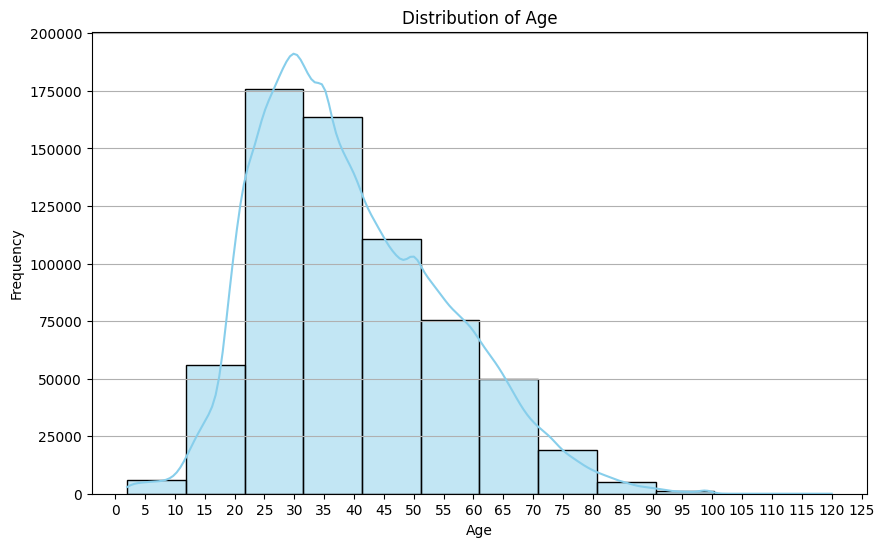

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df_age, x='Vict Age', bins=12, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 130, 5))  # Set x-axis ticks from 0 to 100 with intervals of 10
plt.grid(axis='y')
plt.show()

📊 The highest number of victims belonged to the age group 25-40 years.

📊 There were very few victims aged over 70 years.

In [147]:
#What kind of crime was most common for victim of age group between 25-40 years?

df[(df['Vict Age'] >= 25) & (df['Vict Age'] <= 40)]['Crm Cd Desc'].value_counts().sort_values(ascending=False)

Crm Cd Desc
BURGLARY FROM VEHICLE                             27812
THEFT OF IDENTITY                                 25472
BATTERY - SIMPLE ASSAULT                          25278
INTIMATE PARTNER - SIMPLE ASSAULT                 23832
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    19997
                                                  ...  
PICKPOCKET, ATTEMPT                                   1
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)          1
FIREARMS RESTRAINING ORDER (FIREARMS RO)              1
CHILD ABANDONMENT                                     1
GRAND THEFT / INSURANCE FRAUD                         1
Name: count, Length: 129, dtype: int64

🚗 Age group 25-40 reported a high number of BURGLARY FROM VEHICLE cases: 27812 incidents.

In [148]:
#What kind of crime was committed against aged people?

df[(df['Vict Age'] > 70)]['Crm Cd Desc'].value_counts().sort_values(ascending=False)

Crm Cd Desc
BURGLARY                                                   3439
BATTERY - SIMPLE ASSAULT                                   2703
THEFT OF IDENTITY                                          2653
THEFT PLAIN - PETTY ($950 & UNDER)                         1766
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    1477
                                                           ... 
DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01          1
RECKLESS DRIVING                                              1
CONSPIRACY                                                    1
WEAPONS POSSESSION/BOMBING                                    1
EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)                      1
Name: count, Length: 98, dtype: int64

🔍 It seems that older individuals reported a significant number of burglary incidents.

## Race-Based Crime Rates: Crime Rates Segmented by Victim Race

_Adding a new column for victim's race_

In [150]:
# Mapping of abbreviations to full descriptions
descent_mapping = {
    'O': 'Other',
    'H': 'Hispanic',
    'B': 'Black or African American',
    'W': 'White',
    'A': 'Asian',
    'I': 'American Indian or Alaska Native',
    'P': 'Native Hawaiian or Other Pacific Islander',
    'X': 'Unknown',  # Placeholder for unknown or missing data
}

# Add a new column 'Vict_Descent_Desc' with full descriptions
df['Race'] = df['Vict Descent'].map(descent_mapping)

# Display the DataFrame to verify the new column has been added
print(df.Race)

1                             Other
2                           Unknown
3                             Other
4                          Hispanic
5                          Hispanic
                    ...            
883982    Black or African American
883983                     Hispanic
883984                     Hispanic
883985                     Hispanic
883986                        White
Name: Race, Length: 662541, dtype: object


In [39]:
df['Race'].value_counts().sort_values(ascending=False)

Race
Hispanic                                     269738
White                                        179118
Black or African American                    124819
Unknown                                       87717
Other                                         69904
Asian                                         19377
American Indian or Alaska Native                840
Native Hawaiian or Other Pacific Islander       237
Name: count, dtype: int64

📊 Most victims belonged to the Hispanic race/ethnicity.

#### The top three races of the victims were:

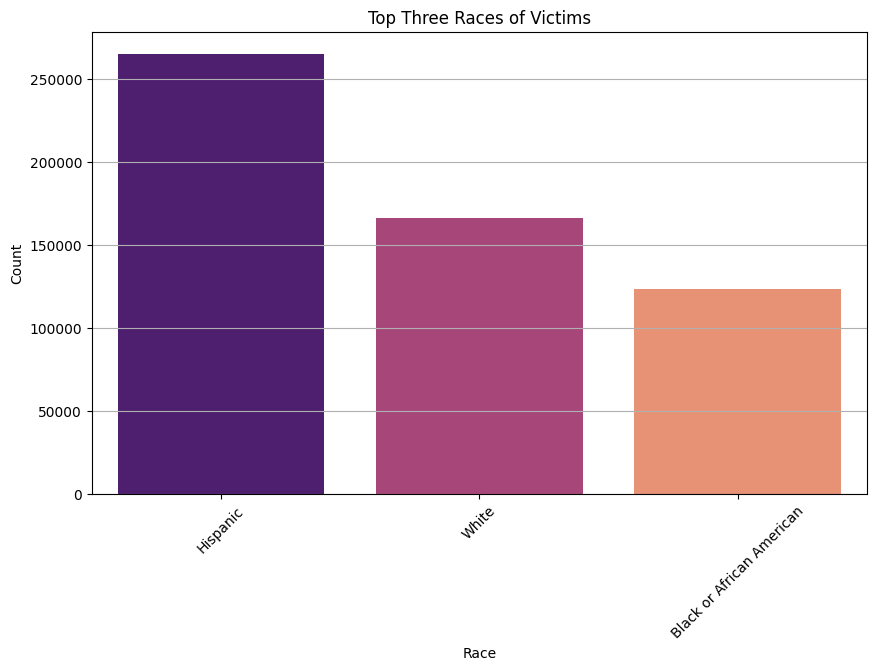

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df['Race'] contains race information
race_counts = df['Race'].value_counts().sort_values(ascending=False)[:3]

# Plot the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, hue=race_counts.index, legend=False, palette='magma')
plt.title('Top Three Races of Victims')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

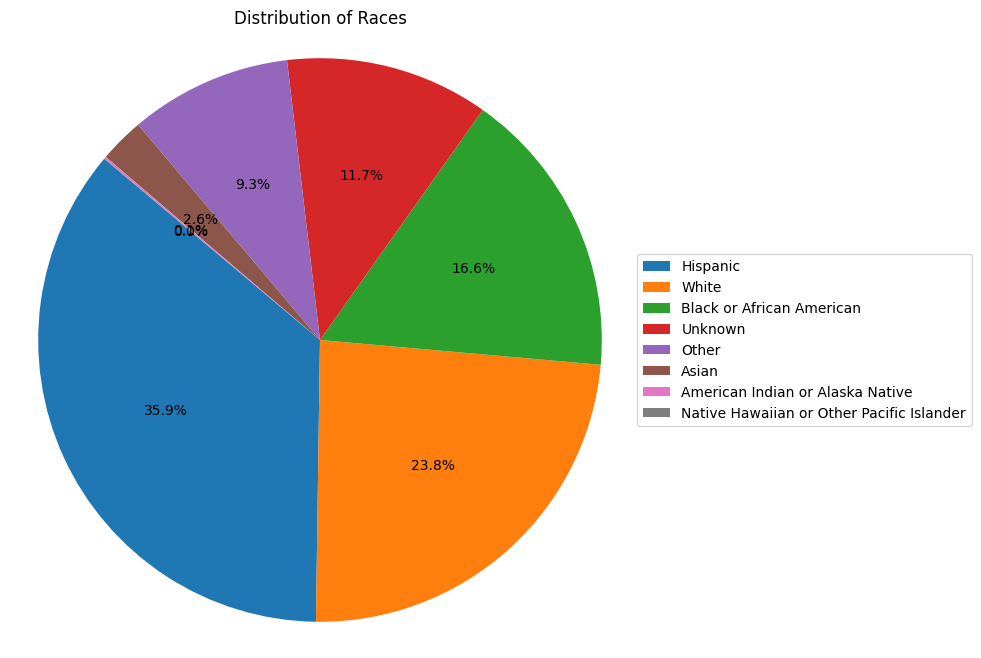

In [41]:
import matplotlib.pyplot as plt

# Assuming df['Race'] contains race information
race_counts = df['Race'].value_counts().sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts.values, labels=None, autopct='%1.1f%%', startangle=140)
plt.legend(race_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Races')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Investigation Status: Overview of Crime Incidents by Investigation Status



In [42]:
df['Status Desc'].value_counts().sort_values(ascending=False)

Status Desc
Invest Cont     707611
Adult Other      95153
Adult Arrest     76714
Juv Arrest        2869
Juv Other         1553
UNK                  4
Name: count, dtype: int64

In [43]:
#Percentage of investigations that are still ongoing:

df['Status Desc'].value_counts().sort_values(ascending=False)/len(df)*100

Status Desc
Invest Cont     80.055187
Adult Other     10.765083
Adult Arrest     8.678997
Juv Arrest       0.324583
Juv Other        0.175698
UNK              0.000453
Name: count, dtype: float64


🔍 Nearly 80% of reported crimes are still under investigation.

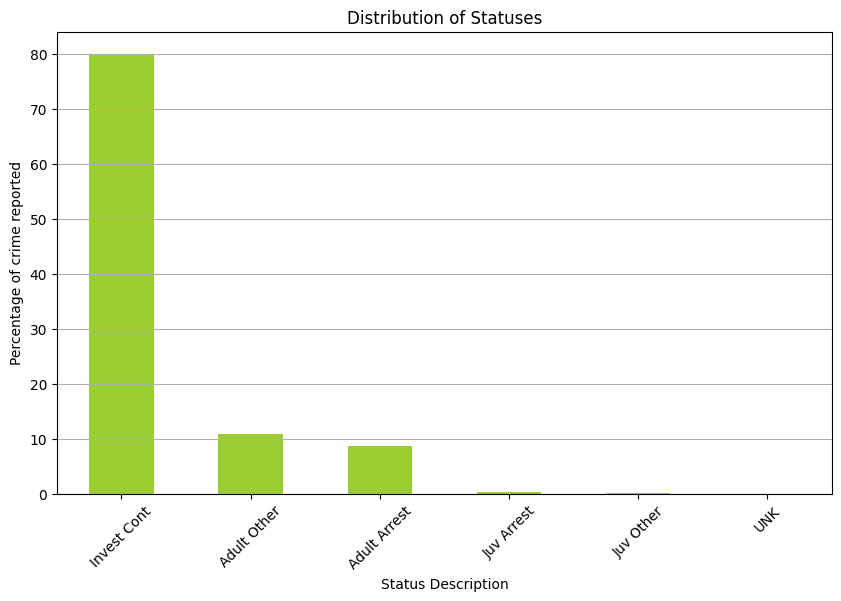

In [44]:
import matplotlib.pyplot as plt

status_counts = df['Status Desc'].value_counts().sort_values(ascending=False)/len(df)*100

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='yellowgreen')
plt.title('Distribution of Statuses')
plt.xlabel('Status Description')
plt.ylabel('Percentage of crime reported')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [45]:
#In what kind  of crime Juv were arrested?

df[df['Status Desc'] == 'Juv Arrest']['Crm Cd Desc'].value_counts().sort_values(ascending=False)

Crm Cd Desc
ROBBERY                                                    572
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             506
BATTERY - SIMPLE ASSAULT                                   334
VEHICLE - STOLEN                                           149
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    147
                                                          ... 
STALKING                                                     1
BURGLARY FROM VEHICLE, ATTEMPTED                             1
VIOLATION OF TEMPORARY RESTRAINING ORDER                     1
BIKE - STOLEN                                                1
PANDERING                                                    1
Name: count, Length: 80, dtype: int64

🔒 572 juveniles were arrested for robbery, indicating that robbery was the primary crime committed by juveniles.

In [110]:
#In what kind  of crime Adults were arrested the most?

df[df['Status Desc'] == 'Adult Arrest']['Crm Cd Desc'].value_counts().sort_values(ascending=False)/len(df[df['Status Desc'] == 'Adult Arrest'])*100

Crm Cd Desc
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              13.963553
INTIMATE PARTNER - SIMPLE ASSAULT                           11.863545
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      6.864458
ROBBERY                                                      6.784941
BURGLARY                                                     5.683448
                                                              ...    
DRUGS, TO A MINOR                                            0.001304
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM     0.001304
DISHONEST EMPLOYEE ATTEMPTED THEFT                           0.001304
DISHONEST EMPLOYEE - PETTY THEFT                             0.001304
GRAND THEFT / AUTO REPAIR                                    0.001304
Name: count, Length: 121, dtype: float64

📉 13% of the arrested adults faced charges of 'Assault with deadly weapon'.

## Analyzing the Types of Committed Crimes





In [108]:
df['Crm Cd Desc'].value_counts().sort_values(ascending=False)

Crm Cd Desc
VEHICLE - STOLEN                                      94922
BATTERY - SIMPLE ASSAULT                              70311
THEFT OF IDENTITY                                     54926
BURGLARY FROM VEHICLE                                 54536
BURGLARY                                              54070
                                                      ...  
THEFT, COIN MACHINE - ATTEMPT                             5
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                  4
FAILURE TO DISPERSE                                       3
DISHONEST EMPLOYEE ATTEMPTED THEFT                        2
Name: count, Length: 138, dtype: int64

##### Visualization of Reported Crime Types




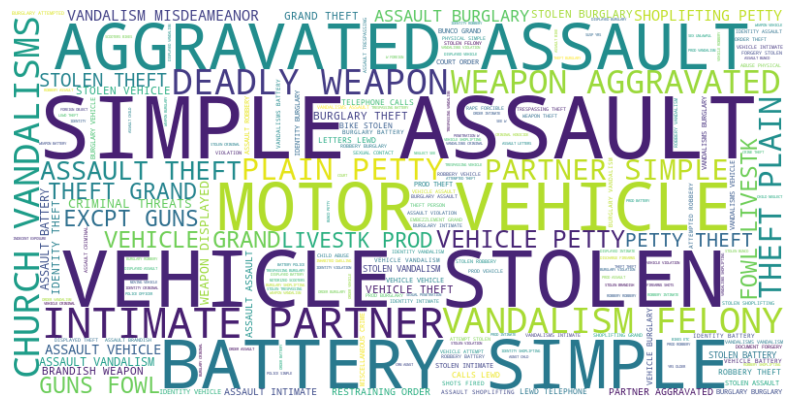

In [53]:
from wordcloud import WordCloud
crime_types = df['Crm Cd Desc']

# Join all crime types into a single string
all_crime_types = ' '.join(crime_types)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_crime_types)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

🔍 The most prevalent crime types identified from the word cloud are: 1. Simple assault 2. Vandalism 3. Vehicle theft.

- Most common type of crime in general : 1. Vehicle stealing 2. Simple Assualt 3. THEFT OF IDENTITY

## Average daily crime rate

In [69]:
df['DATE OCC'].value_counts().mean()

596.0242751180041


📅 On average, the daily count of crime incidents reaches around 59..

In [70]:
df['Date Rptd'].value_counts().mean()

594.8209959623149

📅 Approximately 594 crime cases are reported on a daily basis.

In [158]:
(df['DATE OCC'].dt.year.value_counts()/365).sort_index()
#Avg daily crime incidents year-wise

DATE OCC
2020    414.383562
2021    435.706849
2022    489.449315
2023    456.147945
2024     19.493151
Name: count, dtype: float64

📅 The year 2022 recorded the highest average number of crime incidents per day.

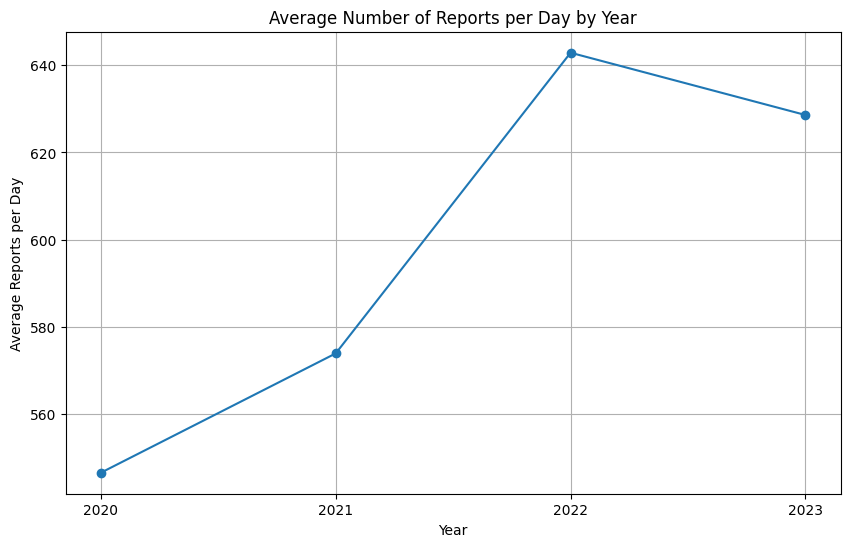

In [90]:
import matplotlib.pyplot as plt

# Calculate the average number of reports per day for each year and sort by year
avg_reports_per_day = (df['DATE OCC'].dt.year.value_counts() / 365).sort_index()[:4]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(avg_reports_per_day.index, avg_reports_per_day.values, marker='o', linestyle='-')
plt.title('Average Number of Reports per Day by Year')
plt.xlabel('Year')
plt.ylabel('Average Reports per Day')
plt.grid(True)
plt.xticks(avg_reports_per_day.index)  # Set x-axis ticks to the years
plt.show()

- The average number of cases has increased over the years.
- Dropped the year 2024 because very not all cases were present in the dataset.

# Maximum crime reported and occurred on which day?


In [98]:
df['DATE OCC'].value_counts().sort_values(ascending=False)

DATE OCC
2022-12-02    1132
2020-01-01    1118
2023-01-01    1097
2023-02-01    1076
2022-10-01    1070
              ... 
2020-03-29     421
2020-03-22     417
2020-04-09     415
2024-01-21     366
2024-01-22     144
Name: count, Length: 1483, dtype: int64

- Maximum crime incidents occured on : 2022-12-02
- What happended that day?

In [102]:
df[df['DATE OCC'] == '2022-12-02']['Crm Cd Desc'].value_counts()

Crm Cd Desc
THEFT OF IDENTITY                                           471
VEHICLE - STOLEN                                             63
THEFT PLAIN - PETTY ($950 & UNDER)                           59
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          57
BURGLARY                                                     50
BURGLARY FROM VEHICLE                                        46
BATTERY - SIMPLE ASSAULT                                     45
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      40
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     34
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              31
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               25
INTIMATE PARTNER - SIMPLE ASSAULT                            23
CRIMINAL THREATS - NO WEAPON DISPLAYED                       21
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     18
ROBBERY                                                      14
VANDALISM - MISDEAMEANOR ($3

- Many people reported 'Theft of identity' on that day.